In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [4]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\533759718.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\533759718.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()


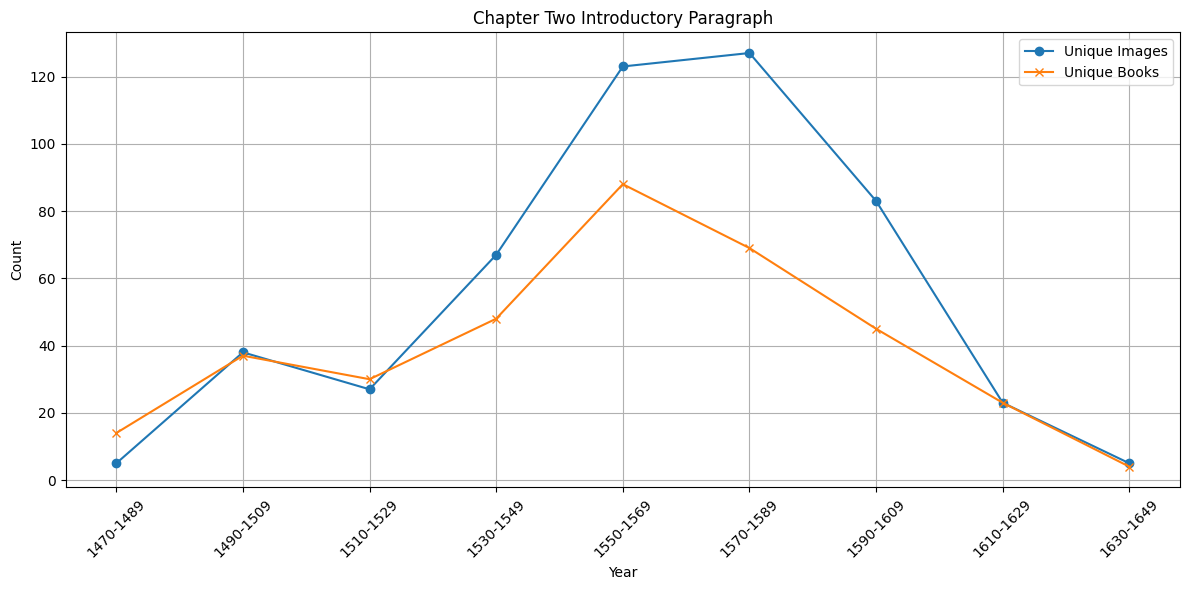

In [5]:
# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
'CK_Multiple Celestial Circles', 'CK_Armillary Sphere', 'CK_Great and Small Circles Definition'

]

# Create a boolean mask for the keywords
mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))

# Filter the DataFrame based on the mask
filtered_df = df[mask]

# Count unique images per interval
unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
unique_images_per_interval.columns = ['interval', 'unique_images']

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the two DataFrames on 'interval'
merged_df = pd.merge(unique_images_per_interval, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(merged_df['interval'], merged_df['unique_images'], label='Unique Images', marker='o')
plt.plot(merged_df['interval'], merged_df['unique_books'], label='Unique Books', marker='x')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Chapter Two Introductory Paragraph')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\1729039319.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\1729039319.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\1729039319.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

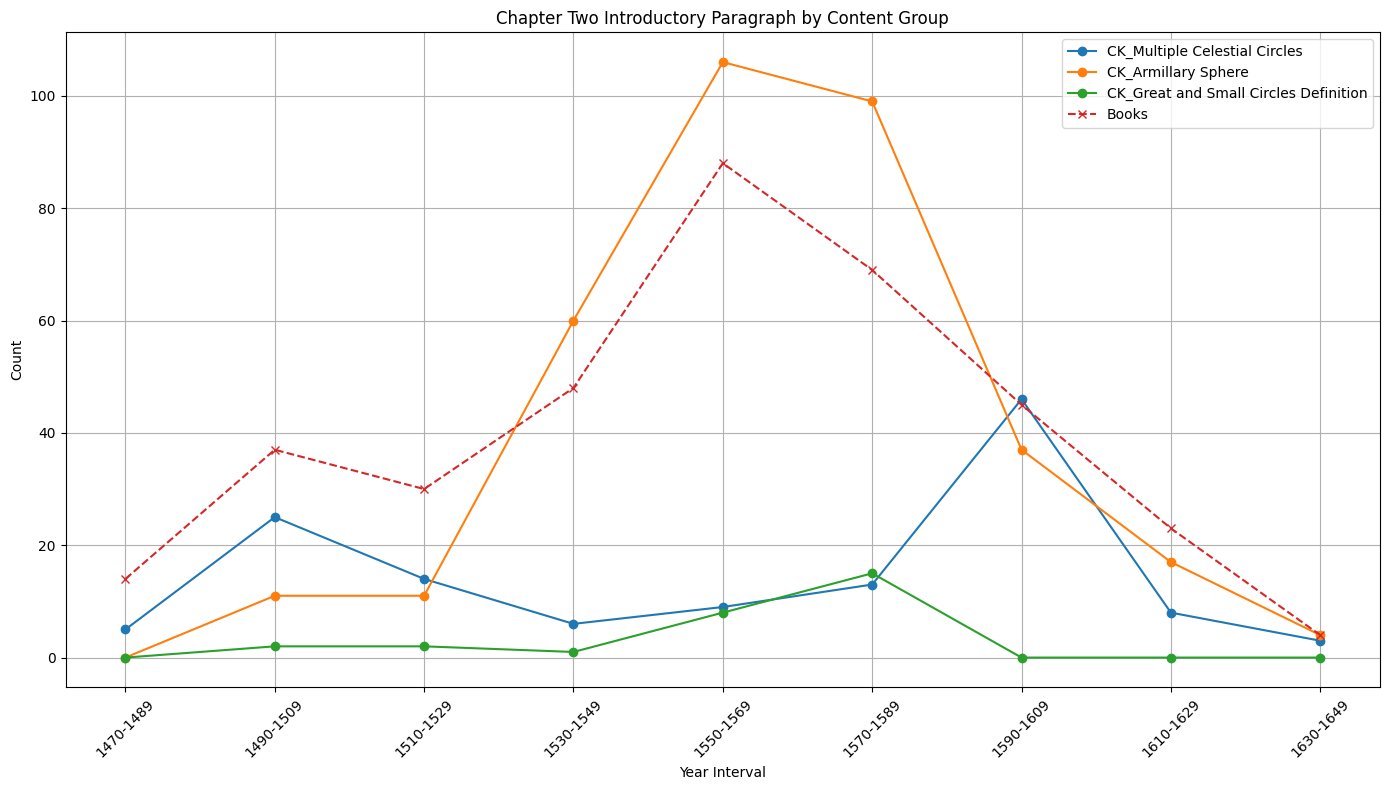

In [6]:
# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
'CK_Multiple Celestial Circles', 'CK_Armillary Sphere', 'CK_Great and Small Circles Definition'
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = df['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')
for keyword in keywords[2:]:
    merged_keyword_df = pd.merge(merged_keyword_df, keyword_dfs[keyword], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(merged_keyword_df, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for keyword in keywords:
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], label=f'{keyword}', marker='o')

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], label='Books', marker='x', linestyle='--')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Chapter Two Introductory Paragraph by Content Group')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_16808\2153897348.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_16808\2153897348.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_16808\2153897348.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

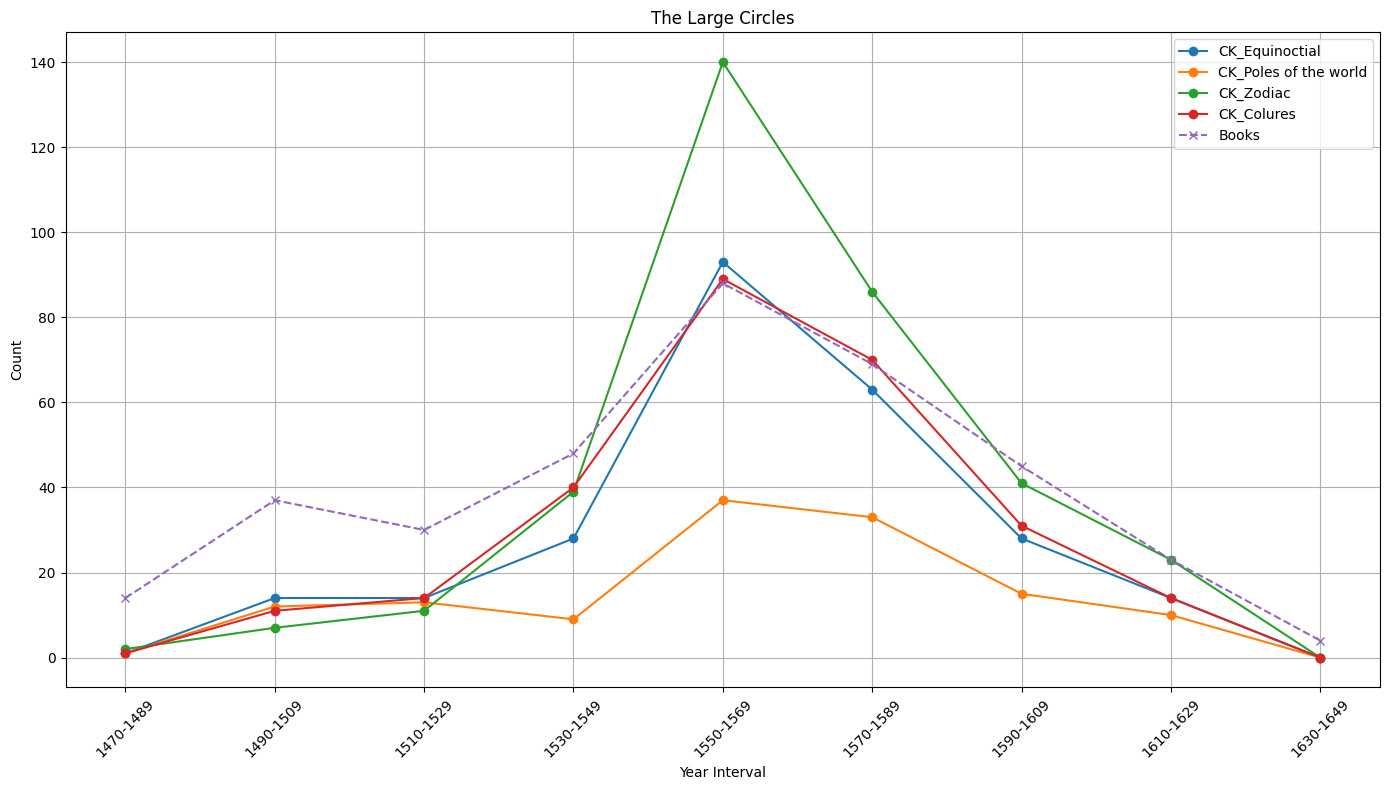

In [7]:
# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
'CK_Equinoctial', 'CK_Poles of the world', 'CK_Zodiac', 'CK_Colures' 
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = df['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')
for keyword in keywords[2:]:
    merged_keyword_df = pd.merge(merged_keyword_df, keyword_dfs[keyword], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(merged_keyword_df, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for keyword in keywords:
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], label=f'{keyword}', marker='o')

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], label='Books', marker='x', linestyle='--')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('The Large Circles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Define the values to filter by
keywords = ['CK_Equinoctial', 'CK_Poles of the world', 'CK_Zodiac', 'CK_Colures']

# Create a boolean mask for filtering
mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))

# Filter the DataFrame
filtered_df = df[mask]

In [8]:
filtered_df

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag,interval
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01833,"CK_Equinoctial, CK_Poles of the world",http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1490,nan,1490-1509
19,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01483,CK_Zodiac,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1490,nan,1490-1509
66,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01833,"CK_Poles of the world, CK_Equinoctial",http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,1926,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1491,nan,1490-1509
75,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01483,CK_Zodiac,http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,1926,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1491,nan,1490-1509
76,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01024,CK_Colures,http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,1926,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1491,nan,1490-1509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20764,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01714,CK_Colures,http://sphaera.mpiwg-berlin.mpg.de/id/item/3dc...,2253,http://sphaera.mpiwg-berlin.mpg.de/id/part/5ff...,Treatise on Cosmography (Sphaera),"Original Part, Content",688,Paris,1555,nan,1550-1569
20789,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00226,CK_Equinoctial,http://sphaera.mpiwg-berlin.mpg.de/id/item/3dc...,2253,http://sphaera.mpiwg-berlin.mpg.de/id/part/5ff...,Treatise on Cosmography (Sphaera),"Original Part, Content",688,Paris,1555,nan,1550-1569
20800,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01176,CK_Colures,http://sphaera.mpiwg-berlin.mpg.de/id/item/662...,2254,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Commentary on Scribonius's Isagoge by Palthenius,"Annotated, Content",663,Frankfurt (Main),1600,nan,1590-1609
20805,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00255,"CK_Armillary Sphere, CK_Zodiac",http://sphaera.mpiwg-berlin.mpg.de/id/item/662...,2254,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Commentary on Scribonius's Isagoge by Palthenius,"Annotated, Content",663,Frankfurt (Main),1600,nan,1590-1609


In [9]:
# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\celestial_circles.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

large_circles_visual = pd.merge(filtered_df, excel_data, on='cluster_name', how='left')

In [10]:
large_circles_visual

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,...,multiple moments,multiple perspectives,color,multiple circles,"decorated or stars, tail, scales",picture,terraqueous globe,diagram,small circles representing mutual three dimensional motion,symbol
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01833,"CK_Equinoctial, CK_Poles of the world",http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,no,no,no,no,no,no,no,no,no,no
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01483,CK_Zodiac,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,no,no,no,no,no,no,no,no,no,no
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01833,"CK_Poles of the world, CK_Equinoctial",http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,1926,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,no,no,no,no,no,no,no,no,no,no
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01483,CK_Zodiac,http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,1926,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,...,no,no,no,no,no,no,no,no,no,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01024,CK_Colures,http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,1926,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01714,CK_Colures,http://sphaera.mpiwg-berlin.mpg.de/id/item/3dc...,2253,http://sphaera.mpiwg-berlin.mpg.de/id/part/5ff...,Treatise on Cosmography (Sphaera),"Original Part, Content",688,Paris,...,no,no,yes,yes,yes,no,no,no,no,no
924,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00226,CK_Equinoctial,http://sphaera.mpiwg-berlin.mpg.de/id/item/3dc...,2253,http://sphaera.mpiwg-berlin.mpg.de/id/part/5ff...,Treatise on Cosmography (Sphaera),"Original Part, Content",688,Paris,...,no,no,no,no,no,no,no,no,no,no
925,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01176,CK_Colures,http://sphaera.mpiwg-berlin.mpg.de/id/item/662...,2254,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Commentary on Scribonius's Isagoge by Palthenius,"Annotated, Content",663,Frankfurt (Main),...,no,no,no,no,no,no,no,no,no,no
926,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00255,"CK_Armillary Sphere, CK_Zodiac",http://sphaera.mpiwg-berlin.mpg.de/id/item/662...,2254,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Commentary on Scribonius's Isagoge by Palthenius,"Annotated, Content",663,Frankfurt (Main),...,no,no,yes,no,no,no,no,no,no,no


C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\560319144.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\560319144.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\560319144.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

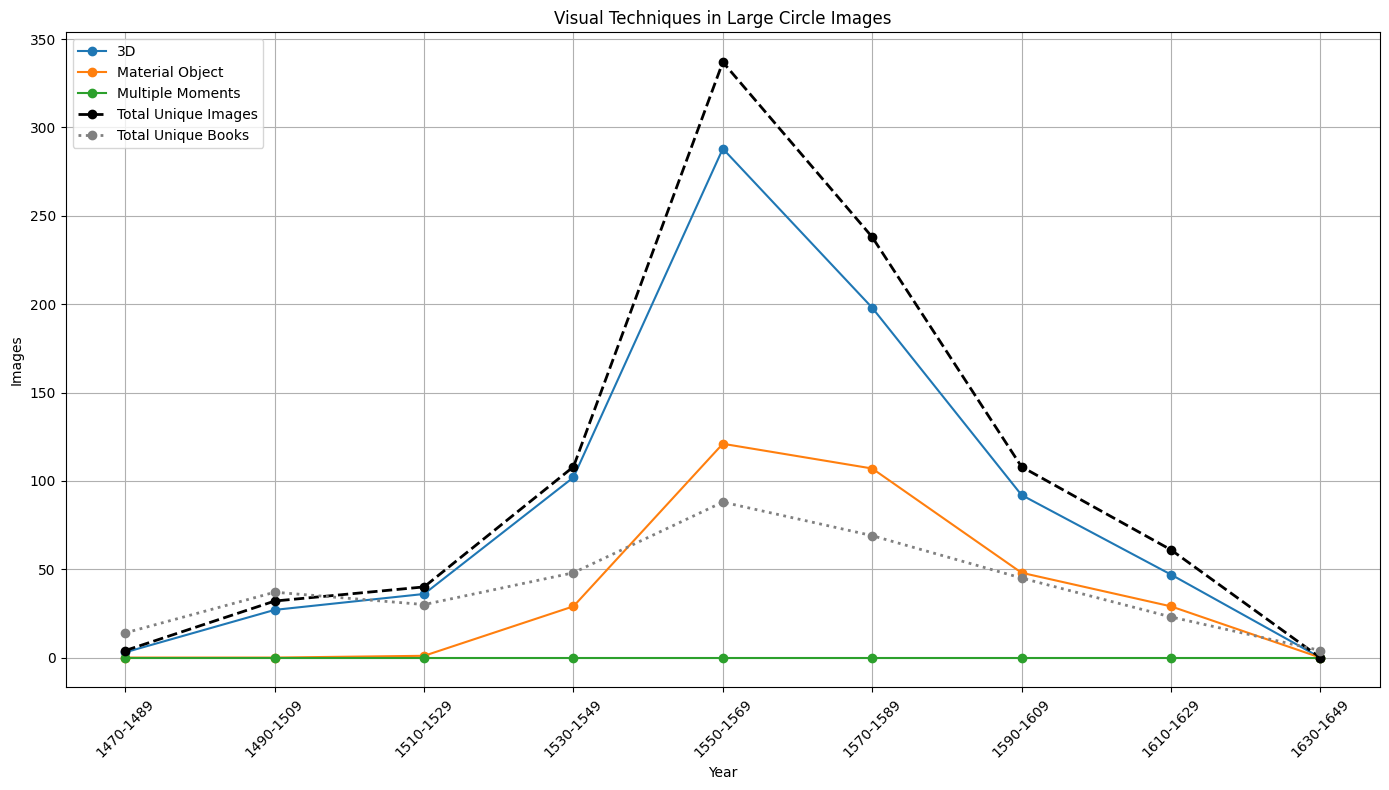

In [11]:
# Convert 'year' to int
large_circles_visual['year'] = large_circles_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
large_circles_visual['interval'] = pd.cut(large_circles_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = large_circles_visual[large_circles_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material_object = count_unique_images_by_column('material object (double lines)', 'yes')
multiple_moments = count_unique_images_by_column('multiple moments', 'yes')
multiple_perspectives = count_unique_images_by_column('multiple perspectives', 'yes')
color = count_unique_images_by_column('color', 'yes')
multiple_circles = count_unique_images_by_column('multiple circles', 'yes')
decorated_or_stars = count_unique_images_by_column('decorated or stars, tail, scales', 'yes')
picture = count_unique_images_by_column('picture', 'yes')
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
small_circles = count_unique_images_by_column('small circles representing mutual three dimensional motion', 'yes')
symbol = count_unique_images_by_column('symbol', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Material Object': material_object,
    'Multiple Moments': multiple_moments,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = large_circles_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Visual Techniques in Large Circle Images')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\1276742231.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\1276742231.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\1276742231.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

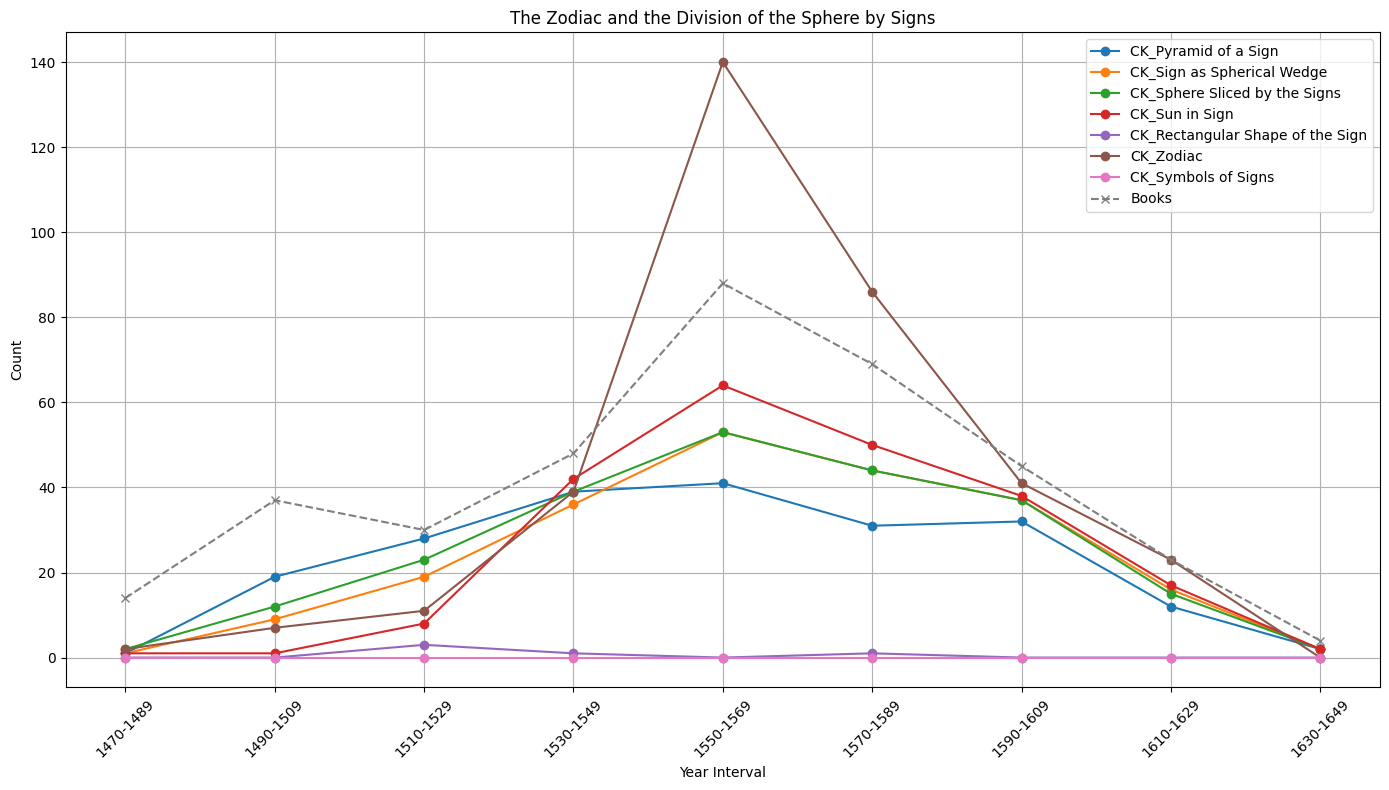

In [12]:
# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
    'CK_Pyramid of a Sign', 'CK_Sign as Spherical Wedge', 'CK_Sphere Sliced by the Signs', 
    'CK_Sun in Sign', 'CK_Rectangular Shape of the Sign', 'CK_Zodiac', 'CK_Symbols of Signs' 
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = df['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')
for keyword in keywords[2:]:
    merged_keyword_df = pd.merge(merged_keyword_df, keyword_dfs[keyword], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(merged_keyword_df, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for keyword in keywords:
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], label=f'{keyword}', marker='o')

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], label='Books', marker='x', linestyle='--')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('The Zodiac and the Division of the Sphere by Signs')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\3966961768.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\3966961768.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\3966961768.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

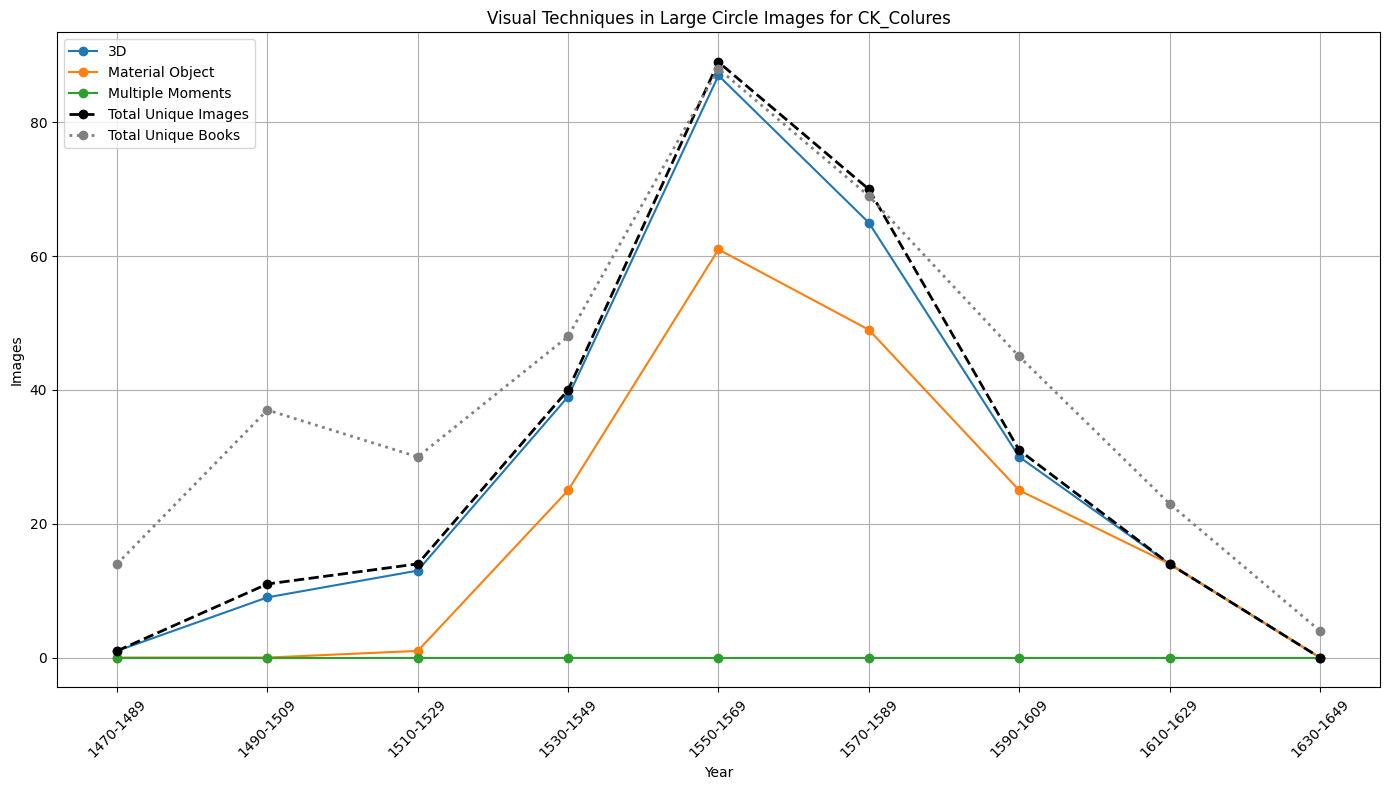

In [17]:
# Assuming 'large_circles_visual' and 'books' DataFrames are already defined

# Convert 'year' to int
large_circles_visual['year'] = large_circles_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
large_circles_visual['interval'] = pd.cut(large_circles_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for clusters with the cks value "CK_Colures"
filtered_large_circles_visual = large_circles_visual[large_circles_visual['cks'] == 'CK_Colures']

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = filtered_large_circles_visual[filtered_large_circles_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material_object = count_unique_images_by_column('material object (double lines)', 'yes')
multiple_moments = count_unique_images_by_column('multiple moments', 'yes')
multiple_perspectives = count_unique_images_by_column('multiple perspectives', 'yes')
color = count_unique_images_by_column('color', 'yes')
multiple_circles = count_unique_images_by_column('multiple circles', 'yes')
decorated_or_stars = count_unique_images_by_column('decorated or stars, tail, scales', 'yes')
picture = count_unique_images_by_column('picture', 'yes')
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
small_circles = count_unique_images_by_column('small circles representing mutual three dimensional motion', 'yes')
symbol = count_unique_images_by_column('symbol', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Material Object': material_object,
    'Multiple Moments': multiple_moments,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = filtered_large_circles_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Visual Techniques in Large Circle Images for CK_Colures')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Define the values to filter by
keywords = ['CK_Pyramid of a Sign', 'CK_Sign as Spherical Wedge', 'CK_Sphere Sliced by the Signs', 
    'CK_Sun in Sign', 'CK_Rectangular Shape of the Sign', 'CK_Zodiac', 'CK_Symbols of Signs']

# Create a boolean mask for filtering
mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))

# Filter the DataFrame
zodiac_signs = df[mask]

In [14]:
# Get unique values from the 'cluster name' column
#unique_clusters = zodiac_signs['cluster_name'].unique()

# Create a new DataFrame from the unique values
#unique_clusters_df = pd.DataFrame(unique_clusters, columns=['Unique Cluster Names'])

# Save the unique values to an Excel file
#unique_clusters_df.to_excel('zodiac_signs.xlsx', index=False)


In [15]:
# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\zodiac_signs.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

being_sign = pd.merge(df, excel_data, on='cluster_name', how='left')

being_sign

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,...,flag,interval,3D,decoration,double image,signs symbols,figurative sign,advanced diagram,sun in sign no sphere circles,scale and numbers
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01833,"CK_Equinoctial, CK_Poles of the world",http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,nan,1490-1509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01349,"CK_Sphericity of the Earth, CK_Populated Earth...",http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,nan,1490-1509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00326,CK_Sphericity of the Water Element,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,nan,1490-1509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00969,"CK_Sphericity of the Earth, CK_Rising and Sett...",http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,nan,1490-1509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01935,CK_Definition of Sphere by Theodosius,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,nan,1490-1509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02183,CK_Terrestrial Maps,http://sphaera.mpiwg-berlin.mpg.de/id/item/921...,2277,http://sphaera.mpiwg-berlin.mpg.de/id/part/14a...,The other World,"Original Part, Content",925,Antwerp,...,nan,1550-1569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20866,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_03591,CK_Terrestrial Maps,http://sphaera.mpiwg-berlin.mpg.de/id/item/921...,2277,http://sphaera.mpiwg-berlin.mpg.de/id/part/14a...,The other World,"Original Part, Content",925,Antwerp,...,nan,1550-1569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20867,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_03630,CK_Terrestrial Maps,http://sphaera.mpiwg-berlin.mpg.de/id/item/921...,2277,http://sphaera.mpiwg-berlin.mpg.de/id/part/14a...,The other World,"Original Part, Content",925,Antwerp,...,nan,1550-1569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20868,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_03637,CK_Terrestrial Maps,http://sphaera.mpiwg-berlin.mpg.de/id/item/921...,2277,http://sphaera.mpiwg-berlin.mpg.de/id/part/14a...,The other World,"Original Part, Content",925,Antwerp,...,nan,1550-1569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\1985593586.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\1985593586.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_12968\1985593586.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

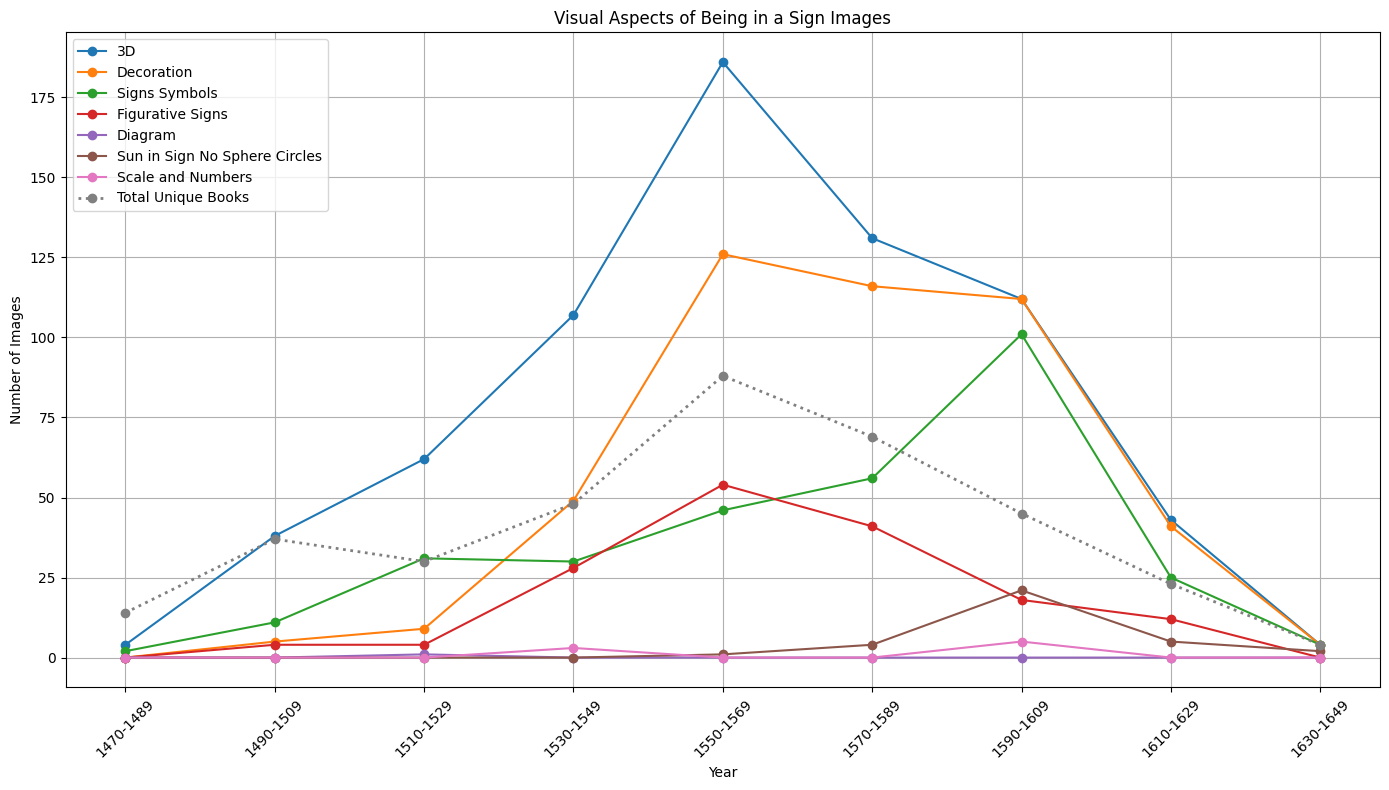

In [16]:
# Convert 'year' to int
being_sign['year'] = being_sign['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
being_sign['interval'] = pd.cut(being_sign['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = being_sign[being_sign[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decoration = count_unique_images_by_column('decoration', 'yes')
signs_symbols = count_unique_images_by_column('signs symbols', 'yes')
figurative_signs = count_unique_images_by_column('figurative sign', 'yes')
diagram = count_unique_images_by_column('advanced diagram', 'yes')
sun_in_sign_with_no_lines = count_unique_images_by_column('sun in sign no sphere circles', 'yes')
scales_or_numbers = count_unique_images_by_column('scale and numbers', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Decoration': decoration,
    'Signs Symbols': signs_symbols,
    'Figurative Signs': figurative_signs,
    'Diagram': diagram,
    'Sun in Sign No Sphere Circles': sun_in_sign_with_no_lines,
    'Scale and Numbers': scales_or_numbers,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
#total_unique_images = being_sign.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
#ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Images')
ax.set_title('Visual Aspects of Being in a Sign Images')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
